<h1 align="center">Análisis exploratorio de datos</h1>

<p align="justify">Un análisis exploratorio de datos (EDA, por sus siglas en inglés) es un proceso utilizado para analizar y entender los datos de un conjunto de datos. El objetivo principal del EDA es descubrir patrones, tendencias y relaciones en los datos que puedan ser útiles para informar una investigación o estudio. </p>

<p align="justify">El EDA se realiza antes de iniciar el análisis formal y se basa en la visualización de los datos, para poder obtener una idea general de la distribución de los mismos y conocer los posibles valores atípicos. También se utilizan estadísticas resumen para conocer las características generales de la población. </p>

<p align="justify">El EDA es importante porque permite detectar problemas en los datos, tales como valores atípicos, errores en la recolección de datos, y problemas de sesgo, así como para identificar patrones interesantes en los datos que pueden informar el diseño de estudios futuros. Es un proceso iterativo, y se debe continuar explorando los datos mientras se van obteniendo nuevos hallazgos.</p>



<h1 align="center">¿Cómo es el comportamiento del publico objetivo del sitio web <a href='https://www.goingbilingual.com/' title="Pagina web de Going Bilingual " target="_blank"> Going Bilingual</a> ?</h1>

<p align="justify">Google Analytics ofrece varias métricas que pueden ayudar a identificar el público objetivo de un sitio web. Algunas de las métricas más comunes son:</p>

<ol align="justify">
  <li>Audiencia: esta métrica proporciona información sobre el número de visitantes únicos, las páginas vistas, el tiempo de permanencia en el sitio y el porcentaje de rebote. Esta información puede ayudar a identificar el tamaño y el comportamiento del público.</li>
  <li>Demografía: esta métrica proporciona información sobre la edad, el género, el idioma y la ubicación geográfica de los visitantes del sitio. Esta información puede ayudar a identificar las características demográficas de la audiencia.</li>
  <li>Intereses: esta métrica proporciona información sobre los intereses y las aficiones de los visitantes del sitio, como el tipo de contenido que prefieren, las marcas que siguen, etc. Esta información puede ayudar a identificar los intereses y las preferencias de la audiencia.</li>
  <li>Adquisición: esta métrica proporciona información sobre cómo los visitantes llegan al sitio, como los motores de búsqueda, las redes sociales, las campañas publicitarias, etc. Esta información puede ayudar a identificar las fuentes de tráfico y a entender cómo los visitantes interactúan con el sitio.</li>
  <li>Comportamiento: esta métrica proporciona información sobre cómo los visitantes interactúan con el sitio, como las páginas vistas, el tiempo de permanencia en el sitio, las acciones de los visitantes, etc.</li>
</ol>

<p align="justify">Google Analytics ofrece varias dimensiones que pueden ayudar a identificar el público objetivo de un sitio web. Algunas de las dimensiones más comunes son:</p>


<ol align="justify">
  <li>Usuario: esta dimensión proporciona información sobre el número de visitantes únicos y los visitantes recurrentes. Esta información puede ayudar a identificar el tamaño y el comportamiento del público.</li>
  <li>Adquisición: esta dimensión proporciona información sobre cómo los visitantes llegan al sitio, como los motores de búsqueda, las redes sociales, las campañas publicitarias, etc. Esta información puede ayudar a identificar las fuentes de tráfico y a entender cómo los visitantes interactúan con el sitio.</li> 
  <li>Adquisición: esta dimensión proporciona información sobre cómo los visitantes llegan al sitio, como los motores de búsqueda, las redes sociales, las campañas publicitarias, etc. Esta información puede ayudar a identificar las fuentes de tráfico y a entender cómo los visitantes interactúan con el sitio.</li>
  <li>Adquisición: esta dimensión proporciona información sobre cómo los visitantes llegan al sitio, como los motores de búsqueda, las redes sociales, las campañas publicitarias, etc. Esta información puede ayudar a identificar las fuentes de tráfico y a entender cómo los visitantes interactúan con el sitio.</li>
  <li>Geografía: esta dimensión proporciona información sobre la ubicación geográfica de los visitantes, como el país, la región y la ciudad. Esta información puede ayudar a identificar las características geográficas de la audiencia y a entender cómo se relaciona con el tráfico del sitio.</li>
</ol>


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/Documentación de trabajo en desarrollo/Trabajo de felipe/Analitica de datos CG'

/content/gdrive/MyDrive/Documentación de trabajo en desarrollo/Trabajo de felipe/Analitica de datos CG


In [ ]:
from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt 
import pandas as pd
import os

In [ ]:
# Construir el objeto de servicio.
SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = 'gaapiaccessforpython-1d2e02237dfd.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(
    KEY_FILE_LOCATION, SCOPES)
service = build('analytics', 'v3', credentials=credentials)

In [ ]:
# Establecer el ID de la vista de Google Analytics
view_id = '195738696'

# Establecer el período de tiempo para recuperar los datos
start_date = '2023-01-01'
end_date = 'today'

# Realizar una llamada a la API de Google Analytics para recuperar los datos de la audiencia
results = service.data().ga().get(
    ids='ga:' + view_id,
    start_date=start_date,
    end_date=end_date,
    metrics='ga:users,ga:pageviews,ga:sessionDuration,ga:bounceRate',
    dimensions='ga:date'
).execute()

In [ ]:
# Procesar los datos recuperados utilizando pandas
data = results.get('rows', [])
df = pd.DataFrame.from_records(data, columns=['date', 'users', 
                    'pageviews', 'sessionDuration', 'bounceRate'])

# Convertir la columna 'date' en una fecha
df['date'] = pd.to_datetime(df['date'])

df = df.astype({'users':float,'pageviews':float,'sessionDuration':float,'bounceRate':float})

# Convertir los datos de la columna 'sessionDuration' en minutos
df['sessionDuration'] = df['sessionDuration'].div(60)

In [ ]:
print(df)

         date  users  pageviews  sessionDuration  bounceRate
0  2023-01-01    1.0        1.0         0.200000    0.000000
1  2023-01-02    0.0        0.0         0.000000    0.000000
2  2023-01-03    6.0       20.0        17.066667   33.333333
3  2023-01-04    2.0        3.0         0.033333   66.666667
4  2023-01-05    0.0        0.0         0.000000    0.000000
5  2023-01-06    8.0       27.0        39.616667   27.272727
6  2023-01-07    7.0       18.0        11.500000   25.000000
7  2023-01-08    4.0       17.0        10.500000    0.000000
8  2023-01-09    5.0       16.0         5.100000   40.000000
9  2023-01-10    8.0       18.0        14.416667   44.444444
10 2023-01-11   12.0       33.0        14.266667   53.333333
11 2023-01-12   12.0       27.0        27.983333   30.769231
12 2023-01-13    8.0       28.0         8.133333   12.500000
13 2023-01-14    7.0       13.0        15.166667   44.444444
14 2023-01-15    3.0       10.0         3.100000   33.333333
15 2023-01-16    2.0    

In [ ]:
#Podemos ver estadísticas básicas del dataframe
print(df.describe())

           users  pageviews  sessionDuration  bounceRate
count  23.000000  23.000000        23.000000   23.000000
mean    5.086957  13.043478        10.055797   30.523908
std     3.342740   9.674137         9.852340   24.337142
min     0.000000   0.000000         0.000000    0.000000
25%     2.500000   6.000000         1.916667   13.392857
50%     5.000000  13.000000         9.800000   33.333333
75%     7.000000  18.000000        14.341667   42.222222
max    12.000000  33.000000        39.616667  100.000000


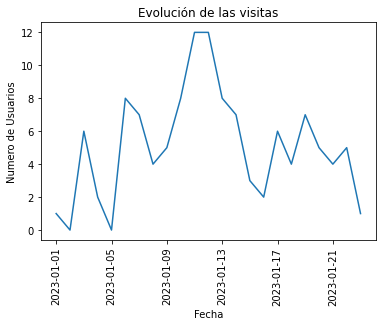

In [ ]:
#Podemos visualizar la evolución de las visitas a lo largo del tiempo
plt.plot(df['date'], df['users'])
plt.xlabel('Fecha')
plt.ylabel('Numero de Usuarios')
plt.title('Evolución de las visitas')
plt.xticks(rotation=90)
plt.show()

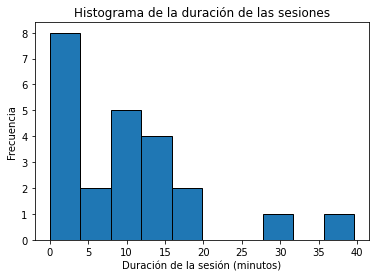

In [ ]:
# Crear el histograma
plt.hist(df['sessionDuration'], bins=10, edgecolor='black')
plt.xlabel('Duración de la sesión (minutos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la duración de las sesiones')
plt.show()

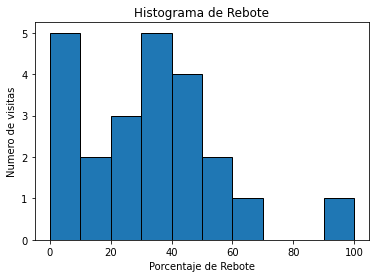

In [ ]:
#Podemos hacer un histograma de los datos de rebote
plt.hist(df['bounceRate'], bins=10, edgecolor='black')
plt.xlabel('Porcentaje de Rebote')
plt.ylabel('Numero de visitas')
plt.title('Histograma de Rebote')
plt.show()

<h1 align="center">Conclusiones</h1>

<ol align="justify">
  <li>En primer lugar, podemos observar que el número de usuarios que visitan el sitio web ha aumentado 08-01-2023 y 15-01-2023.</li>
  <li>A partir del 05-01-2023, no se observa una disminución significativa en el tráfico de la página web, lo que sugiere una estabilidad en la cantidad de visitantes.</li>
  <li>En el análisis de los datos, se puede observar que el número mínimo de visitas a la página web se registró el día 05-01-2023.</li>
  <li>El tiempo de duración mas frecuente de los usuarios en la pagina web es de 0 a 5 minutos, lo cual sugiere que la mayoría de los usuarios navegan brevemente en el sitio.</li>
  <li>El tiempo de permanencia promedio de los usuarios en el sitio web se encuentra en el rango de 4 a 20 minutos.</li>
  <li>Se ha observado un patrón en el cual existen personas que han permanecido en el sitio web por un período de tiempo considerablemente mayor al promedio, lo que sugiere que estas visitas pueden ser consideradas como atípicas.</li>
  <li>La asimetria de la metrica "porcentaje de rebote" es posistiva, lo que sugiere que los usuarios están encontrando el contenido relevante y están interactuando con él, lo que se traduce en un tiempo de permanencia prolongado en el sitio web.</li>
</ol>



